## Lecture 4 - Introduction to Pandas

Pandas is Python package with a set of tools for fast, efficient data analysis. It defines some fundamental structures for working with data.

Pandas first reads the data from disk into memory and into a DataFrame using the excellent and versatile **read_csv** function. The output for both the columns and the index is in bold font, which makes them easy to identify. By convention, the terms **index label** and **column name** refer to the individual members of the index and columns, respectively. The term index refers to all the index labels as a whole just as the term columns refers to all the column names as a whole.

![image 1](images/image1.png)

The columns and the index serve a particular purpose, and that is to provide labels for the columns and rows of the DataFrame. These labels allow for direct and easy access to different subsets of data. When multiple Series or DataFrames are combined, the indexes align first before any calculation occurs. Collectively, the columns and the index are known as the **axes**.

DataFrame data (values) is always in regular font and is an entirely separate component from the columns or index. Pandas uses **NaN (not a number)** to represent missing values. Notice that even though the **color** column has only string values, it uses NaN to represent a missing value.

The three consecutive dots in the middle of the columns indicate that there is at least one column that exists but is not displayed due to the number of columns exceeding the predefined display limits.

A DataFrame has two axes--a vertical axis (the index) and a horizontal axis(the columns). Pandas borrows convention from NumPy and uses the integers 0/1 as another way of referring to the vertical/horizontal axis.

**Pandas strength include:**

- Fast reading of data
- Row and column manipulation
- Working with date and times series (very strong strengths here)
- Sorting, grouping, re-ordering and general data munging
- Dealing with missing values etc. etc.

**Pandas Data types include:**

**- Series**
    - Like a colum of data
    - Collection of observations on a single variable
**- DataFrame**
    - an object for storing related columns of data
    - Can think of as highly optimised spread sheet

We will start of by importing our libraries and setting up a **Series** with random floats with a name **"vals"**.

### Accessing the main DataFrame components

Each of the three DataFrame components--the **index, columns,** and **data**--may be accessed directly from a DataFrame. Each of these components is itself a Python object with its own unique attributes and methods. It will often be the case that you would like to perform operations on the individual components and not on the DataFrame as a whole.

We will start off by view the values in components index, columns and data by reaing the movie.csv file.

In [138]:
import pandas as pd
import numpy as np

movie = pd.read_csv('data/movie.csv')
index = movie.index
columns = movie.columns
data = movie.values

In [139]:
index

RangeIndex(start=0, stop=4916, step=1)

In [140]:
columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [141]:
data

array([['Color', 'James Cameron', 723.0, ..., 7.9, 1.78, 33000],
       ['Color', 'Gore Verbinski', 302.0, ..., 7.1, 2.35, 0],
       ['Color', 'Sam Mendes', 602.0, ..., 6.8, 2.35, 85000],
       ...,
       ['Color', 'Benjamin Roberds', 13.0, ..., 6.3, nan, 16],
       ['Color', 'Daniel Hsia', 14.0, ..., 6.3, 2.35, 660],
       ['Color', 'Jon Gunn', 43.0, ..., 6.6, 1.85, 456]],
      shape=(4916, 28), dtype=object)

In this example, we will display the data type of each column in a DataFrame. It is crucial to know the type of data held in each column as it fundamentally changes the kind of operations that are possible with it.

In [142]:
movie.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

To get a count of the number of occurences we can use the **dtypes.value_counts()** function.

In [143]:
movie.dtypes.value_counts()

float64    13
object     12
int64       3
Name: count, dtype: int64

In [144]:
movie['director_name']

0           James Cameron
1          Gore Verbinski
2              Sam Mendes
3       Christopher Nolan
4             Doug Walker
              ...        
4911          Scott Smith
4912                  NaN
4913     Benjamin Roberds
4914          Daniel Hsia
4915             Jon Gunn
Name: director_name, Length: 4916, dtype: object

In [145]:
movie.director_name

0           James Cameron
1          Gore Verbinski
2              Sam Mendes
3       Christopher Nolan
4             Doug Walker
              ...        
4911          Scott Smith
4912                  NaN
4913     Benjamin Roberds
4914          Daniel Hsia
4915             Jon Gunn
Name: director_name, Length: 4916, dtype: object

In [146]:
type(movie['director_name'])

pandas.core.series.Series

In [147]:
import pandas as pd
import numpy as np
s = pd.Series(np.random.randn(4), name='vals')

Next lets see what has been stored in our variable.

In [148]:
s

0    1.358500
1    1.226283
2   -0.766451
3    0.489563
Name: vals, dtype: float64

Series are built on top of NumPy arrays, and support many similar operations.

In [149]:
s*100

0    135.850031
1    122.628293
2    -76.645055
3     48.956294
Name: vals, dtype: float64

In [150]:
np.abs(s)

0    1.358500
1    1.226283
2    0.766451
3    0.489563
Name: vals, dtype: float64

However, Series has a bit more than what Numpy has to offer in the form of the **describe()** function.
The descibe function Generates descriptive statistics.

Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.

In [151]:
s.describe()

count    4.000000
mean     0.576974
std      0.973793
min     -0.766451
25%      0.175560
50%      0.857923
75%      1.259337
max      1.358500
Name: vals, dtype: float64

Series also offer more flexible indices.

In [152]:
s.index = ['APPLE', 'ORANGE', 'BANANA','GRAPES']
s

APPLE     1.358500
ORANGE    1.226283
BANANA   -0.766451
GRAPES    0.489563
Name: vals, dtype: float64

## DataFrame

A DataFrame is all the columns while a Series is single column.

In [153]:
import pandas as pd
import numpy as np
df = pd.read_csv("data/titanic_data_sample.csv")

In [154]:
type(df)

pandas.core.frame.DataFrame

Lets dispay our DataFrame

In [155]:
print(df)

    PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   
15           16         1       2   
16           17         0       3   
17           18         1       2   
18           19         0       3   
19           20         1       3   
20           21         0       2   
21           22         1       2   
22           23         1       3   
23           24         1       1   
24           25         0       3   
25           26         1       3   
2

Lets now select the first two index values in the DataFrame.

In [156]:
df[0:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We can also select all data for a particular range of columns, in this next example we will select the **name** and **age** of all those stored in our **DataFrame**.

In [157]:
df[['Name', 'Age', 'Ticket']]

,Name,Age,Ticket
0,"Braund, Mr. Owen Harris",22.0,A/5 21171
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599
2,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803
4,"Allen, Mr. William Henry",35.0,373450
5,"Moran, Mr. James",NaN,330877
6,"McCarthy, Mr. Timothy J",54.0,17463
7,"Palsson, Master. Gosta Leonard",2.0,349909
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,347742
9,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,237736


We can also select specific **rows** and **cols**. The first option uses **"ix"** which is now depricated and will provide a warning.

In [158]:
df.ix[0:2,['Name', 'Age']]

AttributeError: 'DataFrame' object has no attribute 'ix'

In [ ]:
df.loc[0:2,['Name', 'Age']]

,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0


## Conditional indexing
in this next example we will look for all ages greater than **"25"**.

In [ ]:
df[df['Age'] > 25]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S


Our DataFrame has a column for **Name**, however it consist of the **Full Name** of the passenger. Lets look at using the rename function on the **Name** column. 

In [ ]:
df2 = df.rename(columns={'Name': "Full Name"})

In [ ]:
df2[['Full Name', 'Age']]

,Full Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0
5,"Moran, Mr. James",NaN
6,"McCarthy, Mr. Timothy J",54.0
7,"Palsson, Master. Gosta Leonard",2.0
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0
9,"Nasser, Mrs. Nicholas (Adele Achem)",14.0


## Handling Missing Values

The **dropna()** function can be used to drop rows or columns with missing data (NaN). 
By default, it drops all **rows** with any missing entry.

In [ ]:
df['Age'].dropna()
df[df['Age'].isna()]



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


The **fillna()** function can be used to fill missing data (NaN). Lets say for titanic data we
want to fill missing ticket fare with mean ticket fare.

In [ ]:
df3 = df.copy()
mean_age = round(df3["Age"].mean())
print(mean_age)
df3["Age"].fillna(mean_age)


28


0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
5     28.0
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
15    55.0
16     2.0
17    28.0
18    31.0
19    28.0
20    35.0
21    34.0
22    15.0
23    28.0
24     8.0
25    38.0
26    28.0
27    19.0
28    28.0
29    28.0
30    40.0
31    28.0
32    28.0
33    66.0
34    28.0
35    42.0
36    28.0
37    21.0
38    18.0
39    14.0
40    40.0
41    27.0
42    28.0
43     3.0
44    19.0
45    28.0
46    28.0
47    28.0
48    28.0
Name: Age, dtype: float64

## Map and Apply

No need to use for loops while using pandas. Vectorized computation by applying functions over rows and columns using the **map**, **apply** and **applymap** methods.

In [ ]:
df["Name"].dropna().map(lambda x : 'map_' + x)

0                           map_Braund, Mr. Owen Harris
1     map_Cumings, Mrs. John Bradley (Florence Brigg...
2                            map_Heikkinen, Miss. Laina
3      map_Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                          map_Allen, Mr. William Henry
5                                  map_Moran, Mr. James
6                           map_McCarthy, Mr. Timothy J
7                    map_Palsson, Master. Gosta Leonard
8     map_Johnson, Mrs. Oscar W (Elisabeth Vilhelmin...
9               map_Nasser, Mrs. Nicholas (Adele Achem)
10                  map_Sandstrom, Miss. Marguerite Rut
11                         map_Bonnell, Miss. Elizabeth
12                   map_Saundercock, Mr. William Henry
13                      map_Andersson, Mr. Anders Johan
14             map_Vestrom, Miss. Hulda Amanda Adolfina
15                 map_Hewlett, Mrs. (Mary D Kingcome) 
16                             map_Rice, Master. Eugene
17                     map_Williams, Mr. Charles

## Apply
Applies function along input axis of DataFrame. Lets try to increment each value of int column.

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("data/titanic_data_sample.csv")
df['PassengerId'] = df['PassengerId'].astype('int')
df.apply(lambda x: int(x["PassengerId"]), axis=1)

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
20    21
21    22
22    23
23    24
24    25
25    26
26    27
27    28
28    29
29    30
30    31
31    32
32    33
33    34
34    35
35    36
36    37
37    38
38    39
39    40
40    41
41    42
42    43
43    44
44    45
45    46
46    47
47    48
48    49
dtype: int64

In [ ]:
def add_substring(x):
   if type(x)== str:
       return 'applymap_' + x
   else:
      return
df.map(add_substring)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,None,None,None,"applymap_Braund, Mr. Owen Harris",applymap_male,None,None,None,applymap_A/5 21171,None,None,applymap_S
1,None,None,None,"applymap_Cumings, Mrs. John Bradley (Florence ...",applymap_female,None,None,None,applymap_PC 17599,None,applymap_C85,applymap_C
2,None,None,None,"applymap_Heikkinen, Miss. Laina",applymap_female,None,None,None,applymap_STON/O2. 3101282,None,None,applymap_S
3,None,None,None,"applymap_Futrelle, Mrs. Jacques Heath (Lily Ma...",applymap_female,None,None,None,applymap_113803,None,applymap_C123,applymap_S
4,None,None,None,"applymap_Allen, Mr. William Henry",applymap_male,None,None,None,applymap_373450,None,None,applymap_S
5,None,None,None,"applymap_Moran, Mr. James",applymap_male,None,None,None,applymap_330877,None,None,applymap_Q
6,None,None,None,"applymap_McCarthy, Mr. Timothy J",applymap_male,None,None,None,applymap_17463,None,applymap_E46,applymap_S
7,None,None,None,"applymap_Palsson, Master. Gosta Leonard",applymap_male,None,None,None,applymap_349909,None,None,applymap_S
8,None,None,None,"applymap_Johnson, Mrs. Oscar W (Elisabeth Vilh...",applymap_female,None,None,None,applymap_347742,None,None,applymap_S
9,None,None,None,"applymap_Nasser, Mrs. Nicholas (Adele Achem)",applymap_female,None,None,None,applymap_237736,None,None,applymap_C


## Vectorised Operations

In [161]:
df = pd.DataFrame(data={'A':[1,2], 'B':[1.2,1.3]})
df['C'] = df['A']+df['B']
df

,A,B,C
0,1,1.2,2.2
1,2,1.3,3.3


In [162]:
df['D'] = df['A']*3

In [ ]:
df

,A,B,C,D
0,1,1.2,2.2,3
1,2,1.3,3.3,6


In [ ]:
df["E"] = np.sqrt(df["A"])

In [ ]:
df

,A,B,C,D,E
0,1,1.2,2.2,3,1.000000
1,2,1.3,3.3,6,1.414214


In [167]:
import pandas as pd
import numpy as np
df = pd.read_csv("data/titanic_data_sample.csv")

In [169]:

by_gender = df.groupby(by="Sex")
by_gender

In [171]:
by_gender.size()

Sex
female    24
male      25
dtype: int64

In [172]:
by_gender.Age.sum()

Sex
female    484.0
male      487.0
Name: Age, dtype: float64

In [ ]:
by_gender.Age.mean()

Sex
female    25.473684
male      30.437500
Name: Age, dtype: float64

In [ ]:
by_gender.Age.median()

Sex
female    26.0
male      31.0
Name: Age, dtype: float64

In [173]:
gender = list(by_gender.groups.keys())

In [ ]:
gender

['female', 'male']

In [174]:
gender_female_df = by_gender.get_group("female")

In [175]:
gender_female_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S


In [177]:
gender_male_df = by_gender.get_group("male")

In [178]:
gender_male_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S


In [181]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,49.00000,49.000000,49.000000,35.000000,49.000000,49.000000,49.000000
mean,25.00000,0.448980,2.428571,27.742857,0.673469,0.408163,28.101445
std,14.28869,0.502545,0.816497,16.152477,0.965828,1.097694,42.316295
min,1.00000,0.000000,1.000000,2.000000,0.000000,0.000000,7.225000
25%,13.00000,0.000000,2.000000,16.500000,0.000000,0.000000,8.029200
50%,25.00000,0.000000,3.000000,27.000000,0.000000,0.000000,15.500000
75%,37.00000,1.000000,3.000000,38.000000,1.000000,0.000000,29.125000
max,49.00000,1.000000,3.000000,66.000000,4.000000,5.000000,263.000000


In [185]:
df[['PassengerId','Survived','Fare','Age','Pclass','SibSp','Parch']].corr()

,PassengerId,Survived,Fare,Age,Pclass,SibSp,Parch
PassengerId,1.000000,-0.121854,-0.006323,-0.072133,0.126786,0.009058,-0.102276
Survived,-0.121854,1.000000,-0.038695,-0.029531,-0.123305,-0.292573,0.038537
Fare,-0.006323,-0.038695,1.000000,-0.009979,-0.605218,0.419271,0.211105
Age,-0.072133,-0.029531,-0.009979,1.000000,-0.475217,-0.521309,-0.080282
Pclass,0.126786,-0.123305,-0.605218,-0.475217,1.000000,-0.003774,0.126185
SibSp,0.009058,-0.292573,0.419271,-0.521309,-0.003774,1.000000,0.305187
Parch,-0.102276,0.038537,0.211105,-0.080282,0.126185,0.305187,1.000000


## Left Join

In [186]:
left_frame = pd.DataFrame({'key': range(5), 
                           'left_value': ['a', 'b', 'c', 'd', 'e']})

In [ ]:
right_frame = pd.DataFrame({'key': range(2, 7), 
                           'right_value': ['f', 'g', 'h', 'i', 'j']})

In [ ]:
left_frame

,key,left_value
0,0,a
1,1,b
2,2,c
3,3,d
4,4,e


In [ ]:
right_frame

,key,right_value
0,2,f
1,3,g
2,4,h
3,5,i
4,6,j


In [ ]:
pd.merge(left_frame,right_frame, on='key', how='left')

,key,left_value,right_value
0,0,a,NaN
1,1,b,NaN
2,2,c,f
3,3,d,g
4,4,e,h


## Right Join

In [ ]:
left_frame = pd.DataFrame({'key': range(5), 
                           'left_value': ['a', 'b', 'c', 'd', 'e']})

In [ ]:
right_frame = pd.DataFrame({'key': range(2, 7), 
                           'right_value': ['f', 'g', 'h', 'i', 'j']})

In [ ]:
left_frame

,key,left_value
0,0,a
1,1,b
2,2,c
3,3,d
4,4,e


In [ ]:
right_frame

,key,right_value
0,2,f
1,3,g
2,4,h
3,5,i
4,6,j


In [ ]:
pd.merge(left_frame,right_frame, on='key', how='right')

,key,left_value,right_value
0,2,c,f
1,3,d,g
2,4,e,h
3,5,NaN,i
4,6,NaN,j


## Outer Join

In [ ]:
left_frame = pd.DataFrame({'key': range(5), 
                           'left_value': ['a', 'b', 'c', 'd', 'e']})

In [ ]:
right_frame = pd.DataFrame({'key': range(2, 7), 
                           'right_value': ['f', 'g', 'h', 'i', 'j']})

In [ ]:
left_frame

,key,left_value
0,0,a
1,1,b
2,2,c
3,3,d
4,4,e


In [ ]:
right_frame

,key,right_value
0,2,f
1,3,g
2,4,h
3,5,i
4,6,j


In [ ]:
pd.merge(left_frame,right_frame, on='key', how='outer')

,key,left_value,right_value
0,0,a,NaN
1,1,b,NaN
2,2,c,f
3,3,d,g
4,4,e,h
5,5,NaN,i
6,6,NaN,j


## Inner Join

In [ ]:
left_frame = pd.DataFrame({'key': range(5), 
                           'left_value': ['a', 'b', 'c', 'd', 'e']})

In [ ]:
right_frame = pd.DataFrame({'key': range(2, 7), 
                           'right_value': ['f', 'g', 'h', 'i', 'j']})

In [ ]:
pd.merge(left_frame,right_frame, on='key', how='inner')

,key,left_value,right_value
0,2,c,f
1,3,d,g
2,4,e,h


In [189]:
ao = np.loadtxt("data/monthly.ao.index.b50.current.ascii.txt")

In [193]:
dates = pd.date_range('1950-01', '2016-02', freq='ME')

In [194]:
dates

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2015-04-30', '2015-05-31', '2015-06-30', '2015-07-31',
               '2015-08-31', '2015-09-30', '2015-10-31', '2015-11-30',
               '2015-12-31', '2016-01-31'],
              dtype='datetime64[ns]', length=793, freq='ME')

In [195]:
dates.shape

(793,)

In [197]:
AO_data = pd.Series(ao[:dates.size,2], index=dates)

In [ ]:
AO_data

1950-01-31   -0.060310
1950-02-28    0.626810
1950-03-31   -0.008127
1950-04-30    0.555100
1950-05-31    0.071577
1950-06-30    0.538570
1950-07-31   -0.802480
1950-08-31   -0.851010
1950-09-30    0.357970
1950-10-31   -0.378900
1950-11-30   -0.515110
1950-12-31   -1.928100
1951-01-31   -0.084969
1951-02-28   -0.399930
1951-03-31   -1.934100
1951-04-30   -0.776480
1951-05-31   -0.862780
1951-06-30   -0.917860
1951-07-31    0.090023
1951-08-31   -0.377410
1951-09-30   -0.817780
1951-10-31   -0.212910
1951-11-30   -0.068519
1951-12-31    1.987200
1952-01-31    0.368250
1952-02-29   -1.747200
1952-03-31   -1.859500
1952-04-30    0.538520
1952-05-31   -0.773510
1952-06-30   -0.440930
                ...   
2013-08-31    0.154250
2013-09-30   -0.460880
2013-10-31    0.262760
2013-11-30    2.029000
2013-12-31    1.474900
2014-01-31   -0.968760
2014-02-28    0.043775
2014-03-31    1.205800
2014-04-30    0.971970
2014-05-31    0.464210
2014-06-30   -0.507450
2014-07-31   -0.488940
2014-08-31 

<Axes: >

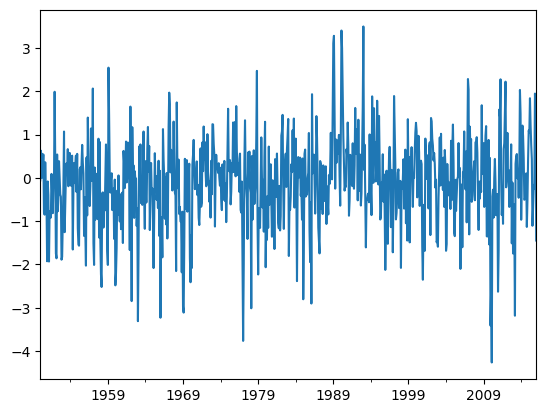

In [198]:
AO_data.plot()

<Axes: >

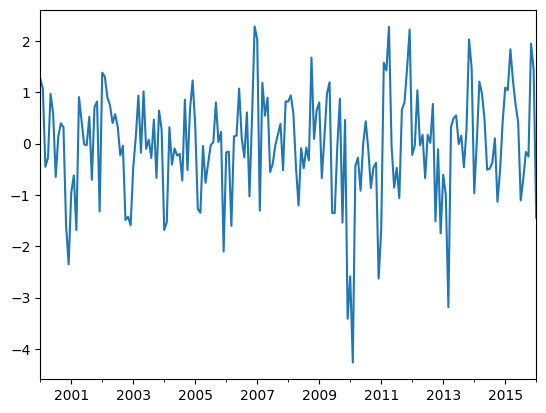

In [199]:
AO_data['2000':'2016'].plot()

<Axes: >

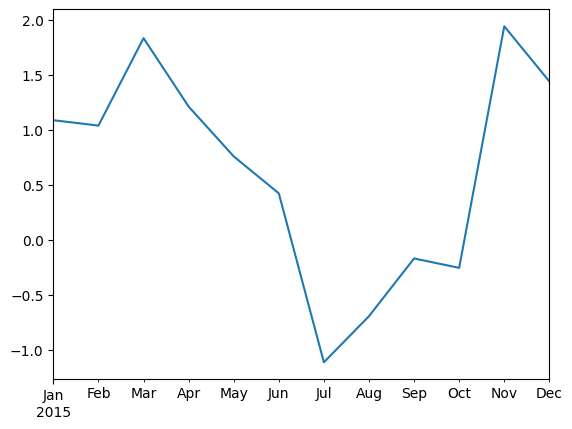

In [200]:
AO_data['2015-01':'2015-12'].plot()

In [201]:
NAO = np.loadtxt("data/norm.nao.monthly.b5001.current.ascii.txt")

In [202]:
NAO

array([[ 1.9500e+03,  1.0000e+00,  9.2000e-01],
       [ 1.9500e+03,  2.0000e+00,  4.0000e-01],
       [ 1.9500e+03,  3.0000e+00, -3.6000e-01],
       ...,
       [ 2.0200e+03,  8.0000e+00,  1.2174e-01],
       [ 2.0200e+03,  9.0000e+00,  9.8498e-01],
       [ 2.0200e+03,  1.0000e+01, -6.5471e-01]], shape=(850, 3))

In [ ]:
dates_NAO = pd.date_range('1950-01', '2016-02', freq='M')

In [ ]:
NAO_data = pd.Series(NAO[:793,2], index=dates_NAO)

In [ ]:
ao_nao = pd.DataFrame({'AO' : AO_data, 'NAO' : NAO_data})

In [ ]:
ao_nao

,AO,NAO
1950-01-31,-0.060310,0.920000
1950-02-28,0.626810,0.400000
1950-03-31,-0.008127,-0.360000
1950-04-30,0.555100,0.730000
1950-05-31,0.071577,-0.590000
1950-06-30,0.538570,-0.060000
1950-07-31,-0.802480,-1.260000
1950-08-31,-0.851010,-0.050000
1950-09-30,0.357970,0.250000
1950-10-31,-0.378900,0.850000


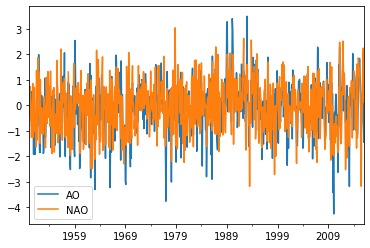

In [ ]:
ao_nao.plot()

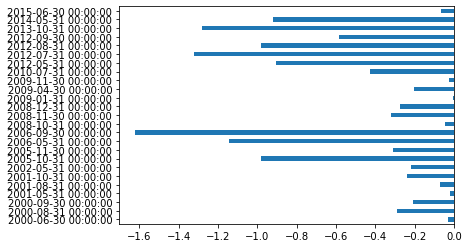

In [ ]:
import datetime
ao_nao.loc[(ao_nao.AO > 0)&(ao_nao.NAO < 0)&(ao_nao.index > datetime.datetime(2000,1,1))&(ao_nao.index<datetime.datetime(2016,1,1)),'NAO'].plot(kind='barh')

In [ ]:
AO_data_mm = AO_data.resample('A').mean()

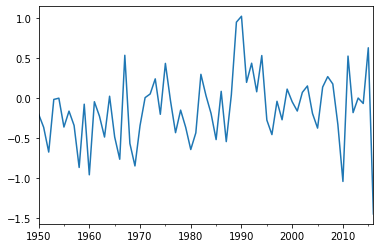

In [ ]:
AO_data_mm.plot()

In [ ]:
AO_data_mm = AO_data.resample('A').median()

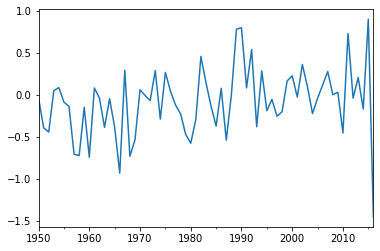

In [ ]:
AO_data_mm.plot()